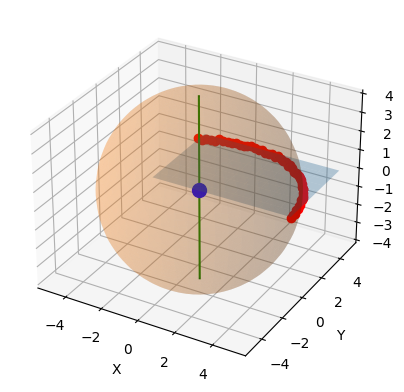

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# wygenerowanie siatki punktów na łuku w 3D
n = 50
r = 5
theta = np.linspace(0, 2*np.pi/3, n)
x = r*np.cos(theta)
y = r*np.sin(theta)
z = np.zeros(n)

for i in range(n):
    z[i] += np.random.uniform(-0.1, 0.1)

# utworzenie macierzy z punktami
points = np.array([x, y, z])

# aproksymacja płaszczyzną
A = np.vstack([points[0], points[1], np.ones(n)]).T
plane_params = np.linalg.lstsq(A, points[2], rcond=None)[0]

# wyznaczenie centrum łuku na płaszczyźnie
center_plane = np.array([-plane_params[0]/(2*plane_params[2]), -plane_params[1]/(2*plane_params[2]), plane_params[2]])

# wyznaczenie promienia sfery
distances = np.linalg.norm(points.T - center_plane, axis=1)
radius = np.mean(distances)

# wyznaczenie wektora normalnego do płaszczyzny
normal_vector = np.array([plane_params[0], plane_params[1], -1])

# wyznaczenie punktów na osi symetrii
axis_start = center_plane - radius * normal_vector / np.linalg.norm(normal_vector)
axis_end = center_plane + radius * normal_vector / np.linalg.norm(normal_vector)

# wyświetlenie wyników
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, 'o', color='red')
ax.scatter(center_plane[0], center_plane[1], center_plane[2], c='blue', s=100)

# wyznaczenie płaszczyzny
xx, yy = np.meshgrid(np.linspace(min(x), max(x), 10), np.linspace(min(y), max(y), 10))
zz = plane_params[0]*xx + plane_params[1]*yy + plane_params[2]
ax.plot_surface(xx, yy, zz, alpha=0.3)

# narysowanie sfery
u = np.linspace(0, 2 * np.pi, 50)
v = np.linspace(0, np.pi, 50)
x_sphere = center_plane[0] + radius * np.outer(np.cos(u), np.sin(v))
y_sphere = center_plane[1] + radius * np.outer(np.sin(u), np.sin(v))
z_sphere = center_plane[2] + radius * np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(x_sphere, y_sphere, z_sphere, alpha=0.2)

# rysowanie osi symetrii
ax.plot([axis_start[0], axis_end[0]], [axis_start[1], axis_end[1]], [axis_start[2], axis_end[2]], color='green')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_zlim([-4, 4])

plt.show()
